In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.8, rc={"lines.linewidth": 1.8})

In [15]:
# Parameters
num_particles = 500  # Number of particles
num_steps = 200  # Number of steps in the simulation
dt = 0.1  # Time step

# Thermal properties
k = 0.6  # Thermal conductivity (W/m·K)
rho_c = 2500  # Volumetric heat capacity of water-sediment mix (J/m³K)
q_z = 0.01  # Vertical flux (positive for downward)
psi = 0.5  # Some factor affecting gamma

# Function for gamma
def gamma(psi, q_z):
    return 1 + psi * np.abs(q_z)

D_T = k / rho_c * gamma(psi, q_z)  # Thermal diffusivity

# Step size for random walk (based on thermal diffusivity)
step_size = np.sqrt(2 * D_T * dt)

# Initial positions of particles (centered at the origin)
particles = np.zeros((num_particles, 2))
temperature = np.ones(num_particles) * 100  # Initial temperature



In [16]:
def update_particles(particles, temperature, step_size, dt):
    angles = np.random.uniform(0, 2 * np.pi, size=num_particles)
    steps = step_size * np.array([np.cos(angles), np.sin(angles)]).T
    new_positions = particles + steps
    temperature *= np.exp(-dt)  # Simulate cooling over time
    return new_positions, temperature


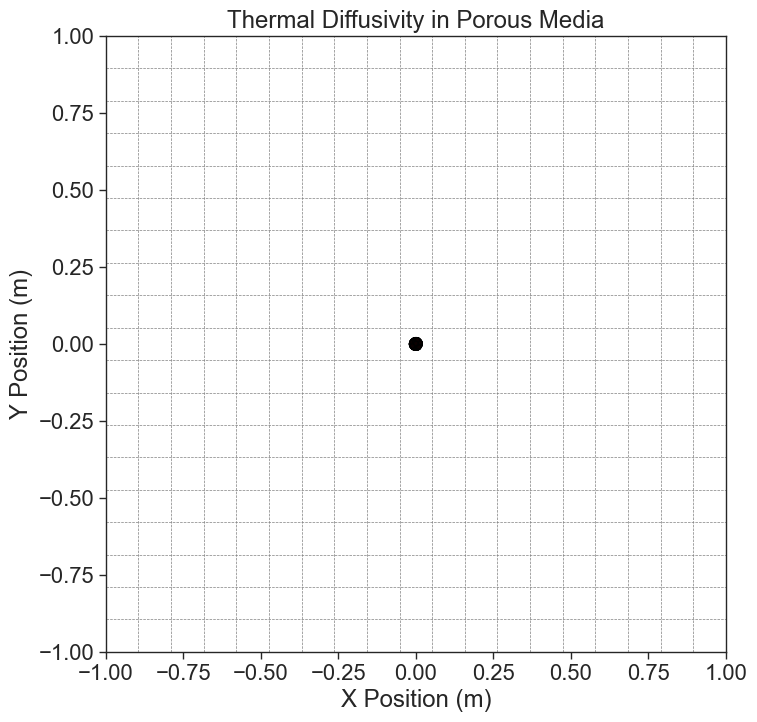

In [17]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
scat = ax.scatter(particles[:, 0], particles[:, 1], s=10, c=temperature, cmap='hot', edgecolor='k')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('Thermal Diffusivity in Porous Media')

# Background grid to represent the porous media
for y in np.linspace(-1, 1, 20):
    ax.axhline(y, color='gray', linestyle='--', linewidth=0.5)
for x in np.linspace(-1, 1, 20):
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5)

# Animation function
def animate(frame):
    global particles, temperature
    particles, temperature = update_particles(particles, temperature, step_size, dt)
    scat.set_offsets(particles)
    scat.set_array(temperature)
    return scat,

# Create animation
anim = FuncAnimation(fig, animate, frames=num_steps, interval=50, blit=True)


In [18]:
# Save the animation as a GIF
writer = PillowWriter(fps=20)
anim.save("thermal_diffusivity_porous_media.gif", writer=writer)

# Display the animation
plt.show()
